# Estudio de Mercado: Proyecto de Venta de Elotes 🌽

Este notebook presenta un análisis detallado de un estudio de mercado realizado para evaluar la viabilidad de un negocio de venta de elotes. Utilizando los datos recopilados a partir de una encuesta, hemos explorado diversos aspectos del interés y las preferencias del consumidor en torno a este producto tradicional.

## Objetivo del Proyecto

El objetivo principal de este estudio es identificar las oportunidades, desafíos y preferencias de los consumidores con respecto a la compra de elotes. Esto incluye factores como la frecuencia de consumo, los lugares de compra preferidos, los sabores y combinaciones más populares, y el rango de precios aceptables. Estos datos permitirán obtener una visión más clara sobre la demanda de elotes en el mercado y establecer una estrategia de negocio eficaz.

## Estructura del Análisis

A lo largo de este notebook, usaremos **Matplotlib** para visualizar los resultados de la encuesta. Las visualizaciones ayudarán a ilustrar tendencias clave y ofrecerán un resumen gráfico de las estadísticas más relevantes, facilitando la interpretación de los datos y la toma de decisiones. A continuación, se desglosan los pasos específicos del análisis:

1. **Descripción de los datos**: Presentación de las variables y dimensiones de la encuesta.
2. **Análisis de la frecuencia de consumo**: ¿Los encuestados tienen una preferencia por los elotes?
3. **Preferencias de compra**: Exploración de los lugares de compra preferidos.
4. **Gustos y preferencias**: Análisis de sabores y combinaciones más populares.
5. **Rango de precios**: Evaluación de los precios que los consumidores están dispuestos a pagar.

Al final de este análisis, se presentarán conclusiones y recomendaciones que podrán servir como base para la toma de decisiones en el desarrollo de este proyecto de venta de elotes.

### Iniciando el proyecto en python
Para iniciar el proyecto, se ha leído un archivo CSV utilizando la biblioteca pandas. El archivo CSV se encuentra en la ruta especificada por la variable fname, que tiene el valor 'p:\\python\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\data\\maizteca.csv'.

El archivo CSV contiene datos recopilados a partir de una encuesta sobre el consumo de elotes. Los datos se han cargado en un DataFrame de pandas llamado maizteca. El DataFrame tiene las siguientes columnas: 'Marca temporal', 'sexo', 'edad', 'gusto elote', 'condimentos favoritos', 'precio', 'formato presentacion', 'intolerante lactosa' y 'grado de coccion'.

El DataFrame maizteca tiene un total de 60 filas y 9 columnas. Algunas columnas pueden contener valores nulos, como se indica en el resumen del DataFrame. Los tipos de datos de todas las columnas son objetos (cadenas de texto).

El objetivo de leer este archivo CSV es utilizar los datos recopilados en la encuesta para realizar un análisis detallado del estudio de mercado sobre la venta de elotes.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd

path = 'data/maizteca.csv'

fname = cbook.get_sample_data(path, asfileobj=False)
maizteca = pd.read_csv(path)

# Convert the text data to numbers, and plot it
data = maizteca.to_numpy()

## Creamos la primera grafica en base a nuestros datos anteriores
Ahora, con ayuda de matplotlib, crearemos la primera grafica de barras usando las funciones de matplotlib

        Sexo  Cantidad de respuestas
0   Femenino                    24.0
1  Masculino                    24.0
2       Otro                    12.0


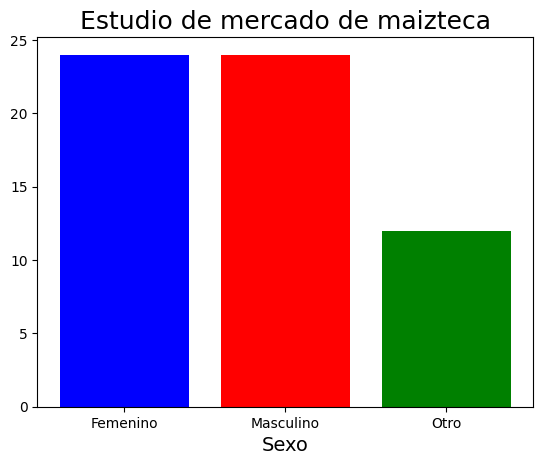

In [6]:
# Get the unique values of the first column
sex_x = np.unique(data[:, 1])

# Based in the unique values of the first column, get the number of answers
sex_y = np.zeros(len(sex_x))


# At the answers column, filter the answers that are not "Masculino" or "Femenino", and set them to "Otro"
for i in range(len(data)):
    if data[i, 1] != "Masculino" and data[i, 1] != "Femenino":
        data[i, 1] = "Otro"

# Count the number of answers and filter the other answers
for i in range(len(data)):
    if data[i, 1] == "Masculino":
        sex_y[0] += 1
    elif data[i, 1] == "Femenino":
        sex_y[1] += 1
    else:
        sex_y[2] += 1

# Set the x to the new unique values
sex_x = np.unique(data[:, 1])
sex_y = np.array([sex_y[0], sex_y[1], sex_y[2]])

# Plot the data in bar
fig, ax = plt.subplots()

# Set the title
ax.set_title("Distribución de sexo")
ax.set_title("Estudio de mercado de maizteca", fontsize=18)
ax.set_xlabel("Sexo", fontsize=14)

# Set the bars colors
colors = ["blue", "red", "green"]

# Print the data in table with pandas
print(pd.DataFrame( {"Sexo": sex_x , "Cantidad de respuestas": sex_y}))

# Set the x and sex_y labels
ax.bar(sex_x, sex_y, color=colors)


# Show the data
plt.show()

Este código realiza un análisis de la distribución de respuestas por sexo en un conjunto de datos y genera una gráfica de barras utilizando Matplotlib. A continuación se detallan los pasos que sigue el código:

1. **Obtener los valores únicos de la primera columna**:
   ```python
   sex_x = np.unique(data[:, 1])
      Se obtienen los valores únicos de la primera columna del conjunto de datos, que representan los diferentes sexos.

2. **Inicializar un array para contar las respuestas**:
   ```python
   sex_y = np.zeros(len(x))
   ```
   Se inicializa un array de ceros con la misma longitud que el número de valores únicos de sexos.

3. **Filtrar y categorizar las respuestas**:
   ```python
   for i in range(len(data)):
       if data[i, 1] != "Masculino" and data[i, 1] != "Femenino":
           data[i, 1] = "Otro"
       print(data[i, 1])
   ```
   Se recorre el conjunto de datos y se categorizan las respuestas que no son "Masculino" o "Femenino" como "Otro".

4. **Contar el número de respuestas por categoría**:
   ```python
   for i in range(len(data)):
       if data[i, 1] == "Masculino":
           sex_y[0] += 1
       elif data[i, 1] == "Femenino":
           sex_y[1] += 1
       else:
           sex_y[2] += 1
   ```
   Se cuenta el número de respuestas para cada categoría de sexo y se almacenan en el array

5. **Actualizar los valores únicos de sexos**:
   ```python
   x = np.unique(data[:, 1])
   sex_y = np.array([sex_y[0], sex_y[1], sex_y[2]])
   ```
   Se actualizan los valores únicos de sexos y se asegura que el array tenga los conteos correctos.

6. **Generar la gráfica de barras**:
   ```python
   fig, ax = plt.subplots()
   ax.set_title("Distribución de sexo")
   ax.set_title("Estudio de mercado de maizteca", fontsize=18)
   ax.set_xlabel("Sexo", fontsize=14)
   colors = ["blue", "red", "green"]
   ax.bar(x, sex_y, color=colors)
   plt.show()
   ```
   Se crea una figura y un conjunto de ejes utilizando Matplotlib. Se establece el título de la gráfica y las etiquetas de los ejes. Luego, se generan las barras de la gráfica con colores específicos para cada categoría de sexo y se muestra la gráfica.

Este código permite visualizar la distribución de respuestas por sexo en un conjunto de datos, facilitando el análisis de la información recolectada.